#Домашнее задание по теме "Обзор основных направлений ИИ"

Канни Эдж Детектор (Canny Edge Detector) — это один из самых известных и широко используемых алгоритмов для обнаружения границ в изображениях.


###Этапы работы Канни Эдж Детектора

1. **Сглаживание изображения (Noise Reduction)**: Первым шагом является применение гауссового фильтра для снижения шумов в изображении. Это делает границы более четкими.

2. **Градиентное преобразование (Gradient Computation)**: Вычисление градиентов изображения, чтобы определить направление и величину изменений интенсивности. Обычно используются операторы Собеля для этого этапа.

3. **Ненаправленное подавление (Non-Maximum Suppression)**: В этом этапе выделяются только те пиксели, которые являются локальными максимумами вдоль направления градиента. Это помогает избавиться от менее выраженных границ.

4. **Двойной порог (Double Thresholding)**: Установка двух пороговых значений для определения сильных и слабых границ. Пиксели, которые превышают высокий порог, считаются границами, а те, что между двумя порогами, будут проверены на связь с сильными границами.

5. **Связывание границ (Edge Tracking by Hysteresis)**: Связывание слабых границ с сильными для окончательного определения границ. Слабые границы, которые соединяются с сильными, считаются границами.

###Пример реализации Канни Эдж Детектора на Python

Вот пример кода на Python, который использует библиотеку OpenCV для реализации Канни Эдж Детектора:



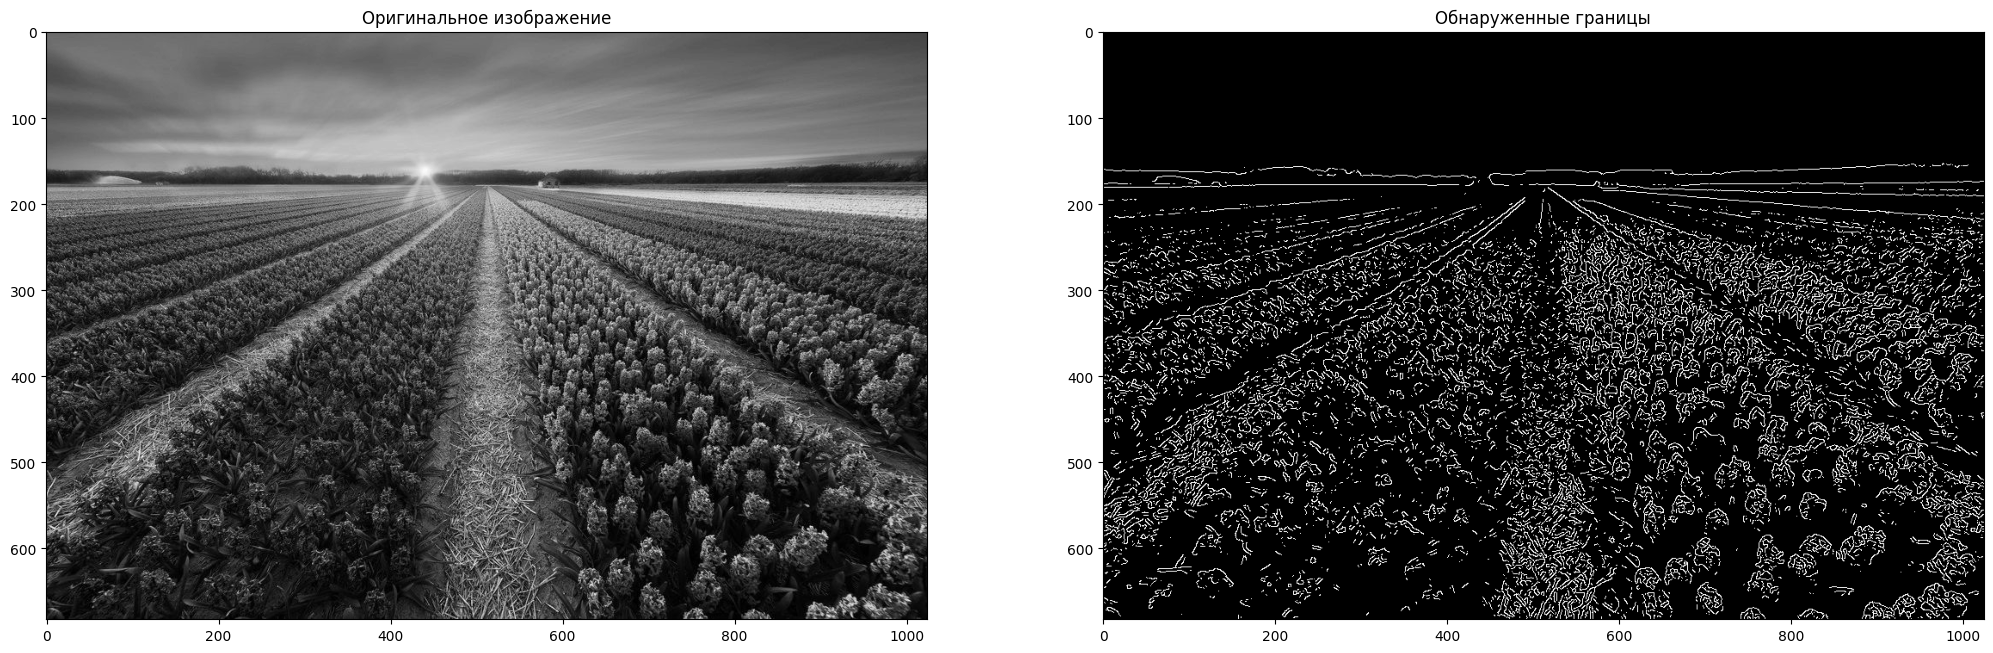

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('/content/FL.jpg', cv2.IMREAD_GRAYSCALE)

# Применение гауссового фильтра для снижения шумов
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Применение Канни Эдж Детектора
edges = cv2.Canny(blurred_image, 100, 100)
# 50 и 150 - это  high threshold и low threshold —
# два пороговых значения, которые используются
# для определения сильных и слабых границ на изображении.

# Отображение результата
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Обнаруженные границы')
plt.imshow(edges, cmap='gray')

plt.show()

### Домашнее задание

Создайте текстовую ячейку в блокноте и напишите в ней свое понимание ответов на следующие вопросы:

1. **Объясните этапы работы Канни Эдж Детектора. Почему каждый этап важен для общего алгоритма?**   

2. **Как выбор значений для двойного порога (high и low threshold) влияет на результаты работы Канни Эдж Детектора?**
   - Поэксперементируйте с примером кода и опишите свои наблюдения.

3. **Используйте Канни Эдж Детектор для различных изображений и сравните результаты. **

4. **Используйте приведенный ниже код для визуализации градиентов в изображении. Подумайте: как можно использовать эти градиенты для других задач в компьютерном зрении?**

5. Сохраните свой блокнот, расшарьте его и направьте ссылку на ваш блокнот на проверку преподавателю.

#NB! Не забудьте загрузить в колаб изображения для тестирования (используйте фотографии из своих источников или интернета).
Замените в коде ссылки на изображения, использованные преподавателем, на ваши. Как это сделать - показано в лекции.


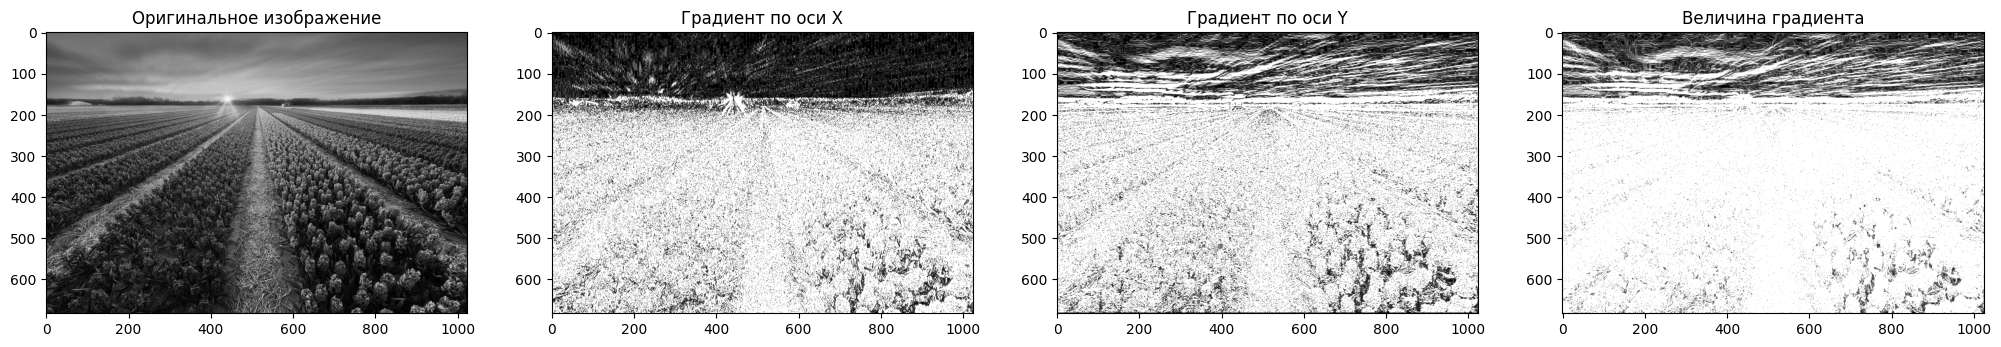

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('/content/FL.jpg', cv2.IMREAD_GRAYSCALE)

# Применение оператора Собеля для вычисления градиентов по осям X и Y
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Градиент по оси X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Градиент по оси Y

# Вычисление величины градиента
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Нормализация градиентов для отображения
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

# Отображение результатов
plt.figure(figsize=(25, 10))

plt.subplot(1, 4, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Градиент по оси X')
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Градиент по оси Y')
plt.imshow(sobel_y, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Величина градиента')
plt.imshow(gradient_magnitude, cmap='gray')

plt.show()


Алгоритм Канни Эдж Детектор (Canny Edge Detector) состоит из следующих этапов:

`**Шумоподавление с помощью фильтра Гаусса:**`

На первом этапе изображение сглаживается с помощью фильтра Гаусса, чтобы уменьшить влияние шума. Шум может создавать ложные грани, поэтому важно минимизировать его влияние. Фильтр Гаусса эффективно устраняет мелкие шумы, сохраняя общие структуры изображения.

`**Нахождение градиентов (вычисление производных):**`

На следующем этапе вычисляются градиенты интенсивности по направлению X и Y с помощью оператора Собеля. Это позволяет найти направление и величину изменений интенсивности пикселей. Градиентная величина показывает, насколько интенсивно изменяется яркость пикселя. Градиентное направление указывает, в каком направлении идет это изменение (по углам 0°, 45°, 90°, 135°).

`**Подавление немаксимумов (Non-Maximum Suppression): **`

На этом этапе проводится подавление немаксимальных значений для того, чтобы "истончить" найденные грани и оставить только те пиксели, которые являются локальными максимумами градиента вдоль его направления. Если пиксель не является максимумом в своем направлении, его интенсивность уменьшается до нуля.

`**Двойная пороговая фильтрация (Double Thresholding):**`

Алгоритм использует два порога (низкий и высокий), чтобы различать сильные и слабые грани. Пиксели с интенсивностью выше высокого порога считаются сильными краями и определенно сохраняются. Пиксели с интенсивностью между низким и высоким порогами считаются слабыми краями. Они сохраняются только если соединены с сильными краями.
Этот шаг помогает отделить реальные края от ложных или слабых сигналов.

`**Трассировка краев с помощью гистерезиса (Edge Tracking by Hysteresis): **`

На финальном этапе выполняется соединение слабых краев, которые непосредственно примыкают к сильным краям. Слабые края удаляются, если они не связаны с сильными. Этот этап завершает процесс поиска и выделения контуров.

`**Важность каждого этапа**`

Шумоподавление важно для минимизации ложных краев.
Нахождение градиентов позволяет обнаружить изменение яркости, что и является признаком наличия краев.
Подавление немаксимумов помогает уменьшить количество ложных или "размытых" краев, сохраняя только четкие линии.
Двойная пороговая фильтрация позволяет отделить сильные края от слабых и шумов.
Трассировка краев гарантирует, что слабые, но значимые края будут учтены, если они принадлежат контурам.

`**Влияние двойного порога на результаты**`

Высокий порог определяет, какие края считаются значимыми (сильными). Если его установить слишком высоким, часть значимых контуров может быть пропущена. Если он слишком низкий, появится слишком много шумов.
Низкий порог определяет, какие пиксели считаются слабыми краями. Если этот порог слишком низкий, много шумовых пикселей будет принято за слабые края. Если его установить слишком высоким, некоторые слабые, но важные края могут быть проигнорированы.

Градиенты — это мощный инструмент для анализа изображений. Они дают информацию о локальных изменениях яркости и направлениях этих изменений, что можно использовать для решения многих задач в компьютерном зрении: от сегментации и детектирования объектов до анализа движения и реконструкции формы.